In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_result_analysis import get_df, plot_metric

/var/folders/fv/hdmdsw6s3fv_72w1tfp22w9m0000gn/T/ipykernel_65154/617140882.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
df_utk_age_25 = get_df("plain_baseline", "utk_face", "v002_target_age_25_bins_3", "3 Bins & Age 25-65")
df_utk_age_19 = get_df("plain_baseline", "utk_face", "v003_target_age_19", "3 Bins & Age 20-40")
df_utk_10_bins = get_df("plain_baseline", "utk_face", "v003_target_age_10_equal_bins", "5 Equal Bins")
df_utk_5_bins = get_df("plain_baseline", "utk_face", "v003_target_age_5_equal_bins", "10 Equal Bins")
df_utk_age_19_data_augmentation = get_df("plain_baseline", "utk_face", "v003_target_age_19_data_augmentation", "3 Bins & Age 20-40 \n& Data Augmentation")
df_list = [df_utk_age_25, df_utk_age_19, df_utk_10_bins, df_utk_5_bins, df_utk_age_19_data_augmentation]

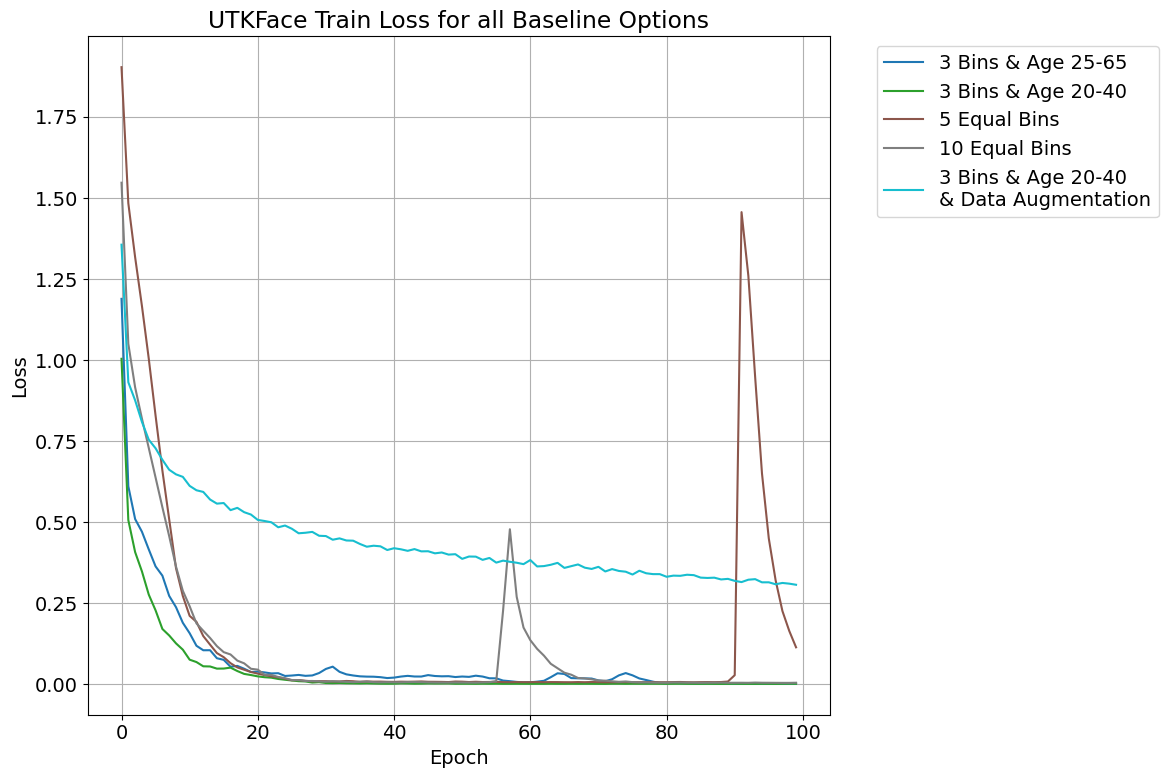

In [11]:

plot_metric(df_list, "train_loss", y_label="Loss", title="UTKFace Train Loss for all Baseline Options")

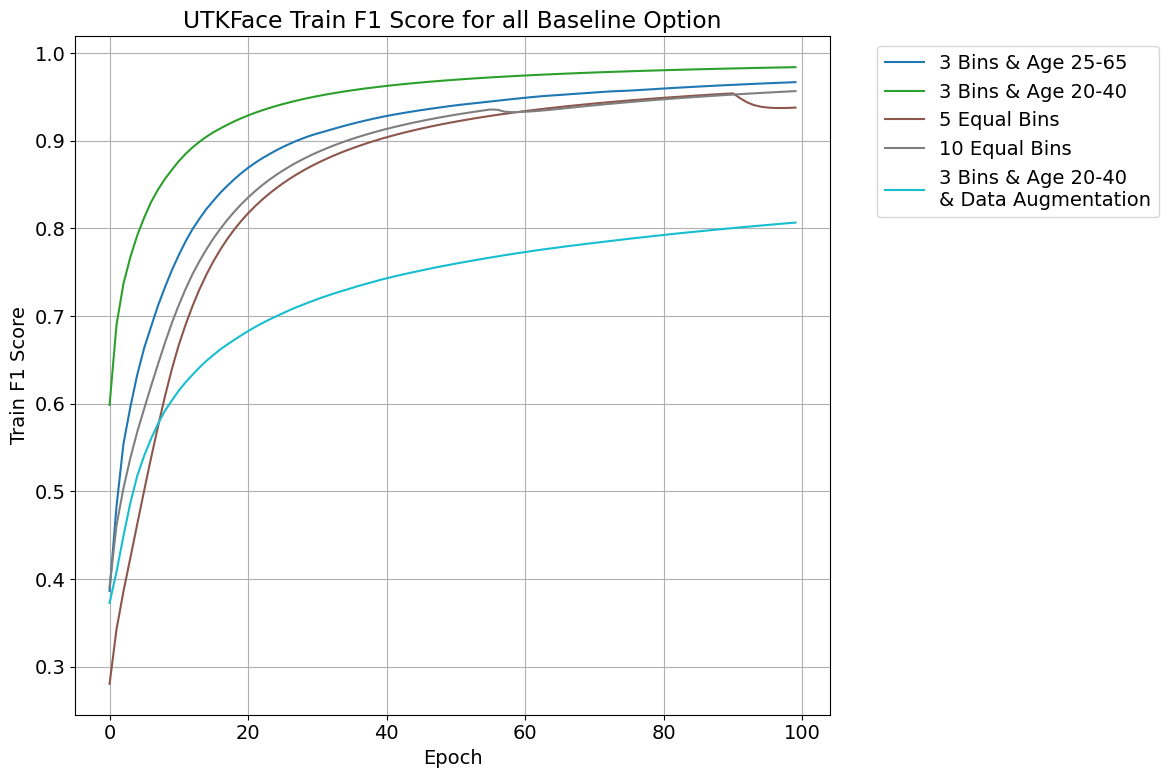

In [12]:
plot_metric(df_list, "train_f1", y_label="Train F1 Score", title="UTKFace Train F1 Score for all Baseline Option")

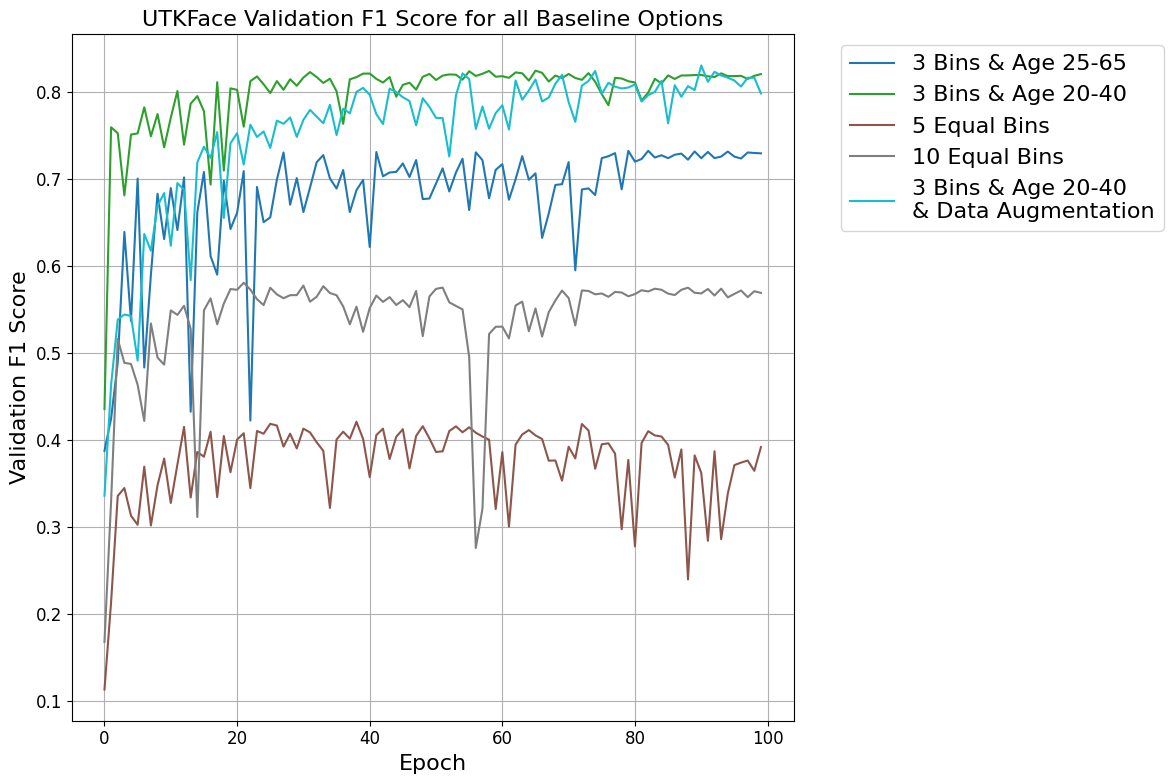

In [10]:
plot_metric(df_list, "valid_f1", y_label="Validation F1 Score", title="UTKFace Validation F1 Score for all Baseline Options", save_fig_path="utk_baseline_figures_validation", fontsize=16)

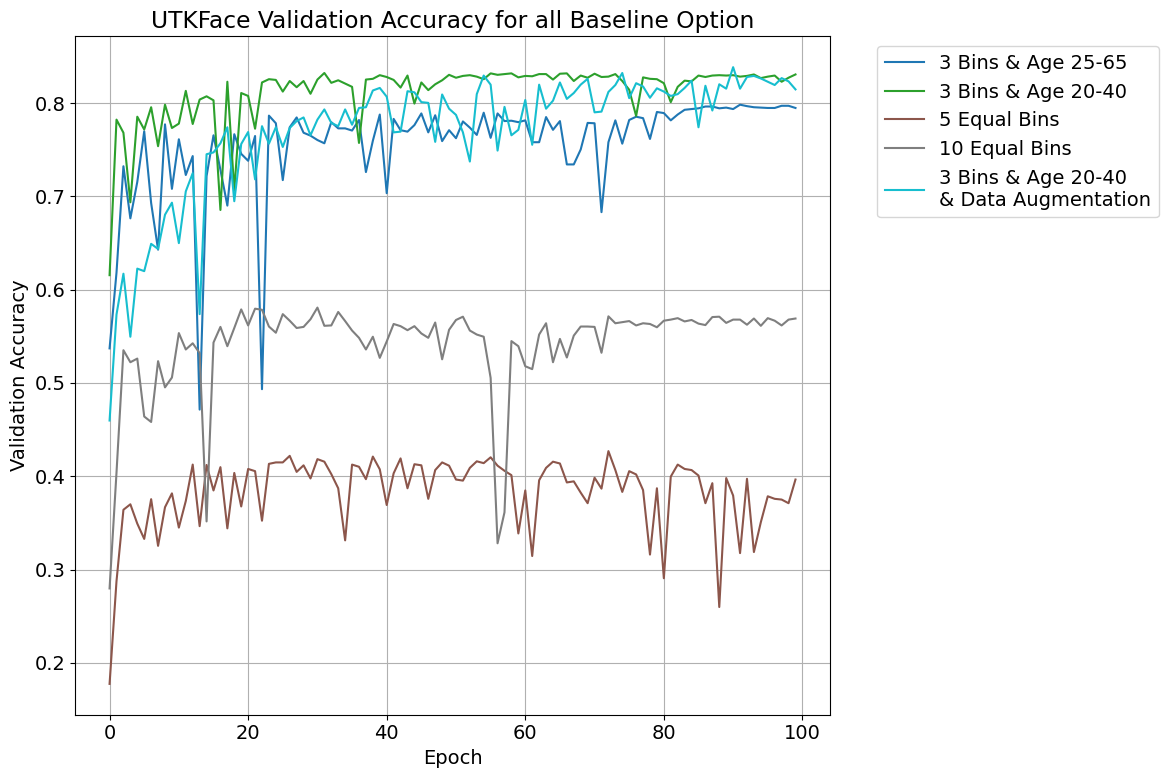

In [14]:
plot_metric(df_list, "valid_acc", y_label="Validation Accuracy", title="UTKFace Validation Accuracy for all Baseline Option")

In [9]:
from src.datasets.UTKFaceDataset import UTKFaceDataset

utk_dataset = UTKFaceDataset(target_name="Age", protected_feature_name="Gender")
train_df = utk_dataset.get_train_dataframe()

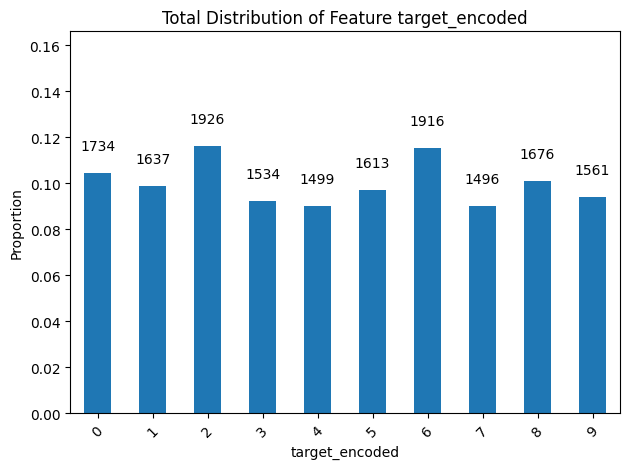

In [16]:
%reload_ext autoreload
from jupyter_notebooks.dataset_analysis.dataset_analysis_utils import plot_protected_feature_distribution, \
    plot_target_distribution

utk_dataset = UTKFaceDataset(target_name="Age", protected_feature_name="Gender", age_bins=10)
train_df = utk_dataset.get_train_dataframe()
plot_target_distribution(train_df, "target_encoded")

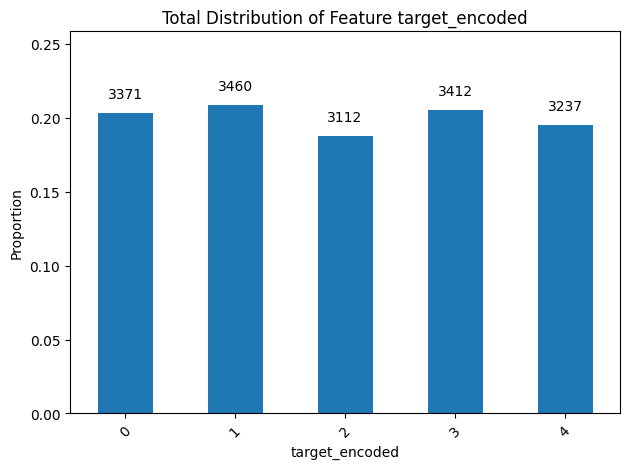

In [17]:
utk_dataset = UTKFaceDataset(target_name="Age", protected_feature_name="Gender", age_bins=5)
train_df = utk_dataset.get_train_dataframe()
plot_target_distribution(train_df, "target_encoded")

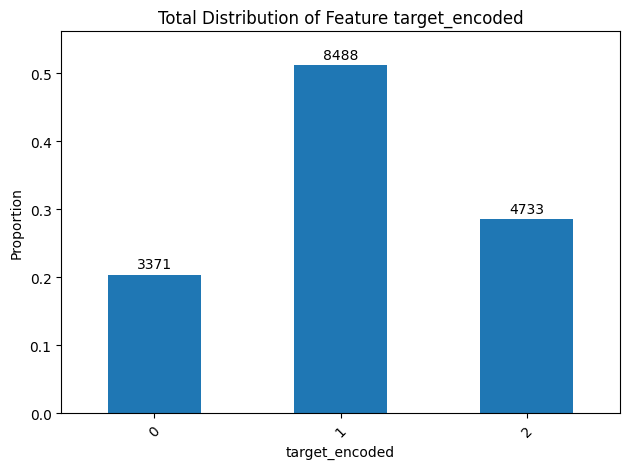

In [18]:
utk_dataset = UTKFaceDataset(target_name="Age", protected_feature_name="Gender", age_bins=[0,20,40,120])
train_df = utk_dataset.get_train_dataframe()
plot_target_distribution(train_df, "target_encoded")

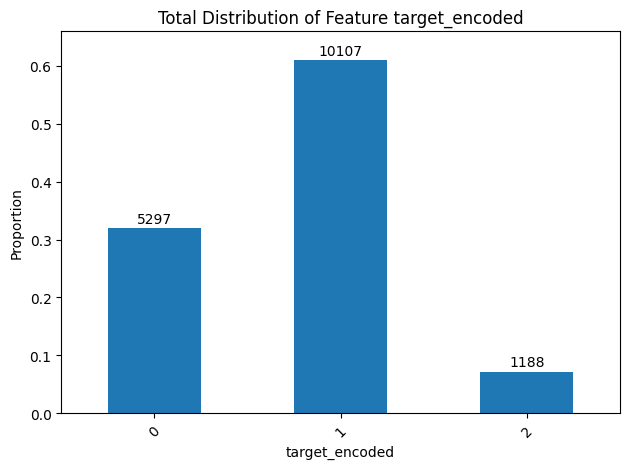

In [19]:
utk_dataset = UTKFaceDataset(target_name="Age", protected_feature_name="Gender", age_bins=[0,25,65,120])
train_df = utk_dataset.get_train_dataframe()
plot_target_distribution(train_df, "target_encoded")